#### in this project, I will be wrangling, analyzing and visualizing the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

#### The data I will be gathering, assesing, cleaning, analyzing, and visualizing will come from a downloadable CSV file, a URL link, and a JSON file extracted from twitter's API.

# Table of contents
1.[Import The Needed Libraries](#Import_Libraries)

2.[Gathering Data](#Gathering)

3.[Assessing Data](#Assessing)

4.[Cleaning Data](#Cleaning)

5.[Storing, Analyzing, and Visualizing Data](#SAV)

# Import The Needed Libraries
<a id = "Import_Libraries"> </a>

In [216]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import io

# Gathering Data
<a id = "Gathering"> </a>

In [217]:
# gather the twitter archive data from the manually downloaded file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [218]:
# gather the image predictions data from the provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url_data = requests.get(url).content
image_predictions = pd.read_csv(io.StringIO(url_data.decode('utf-8')), sep = '\t')

In [219]:
# gather Each tweet's retweet and like counts from the JSON file Acquired from Twitter's API using tweepy
retweet_and_favorite = pd.read_json('tweet-json.txt', lines=True)

# Assessing Data
<a id = "Assessing"> </a>

I will be assessing & and later cleaning the data upon which the analyses and visualizations are based

#### twitter archive data assesment

In [220]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [221]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [222]:
twitter_archive.duplicated().sum()

0

In [223]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [224]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [225]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [226]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [227]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [228]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### image predictions data assesment

In [229]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [230]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [231]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

#### retweet and like data assesment

In [232]:
retweet_and_favorite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [233]:
retweet_and_favorite.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [234]:
retweet_and_favorite['lang'].value_counts()

en     2336
und       7
in        3
nl        3
et        1
es        1
eu        1
tl        1
ro        1
Name: lang, dtype: int64

###  Assesment documentation for twitter archive data

Quality:

1) there are 78 reply

2) there are 181 retweets

3) there are rating numerator above 20

4) there are rating denominator that are not 10 

Tideness:

1) the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns

###  Assesment documentation for image predictions data

Quality:

5) there are 543 predictions (algorithm's #1) that are not for dogs

6) there are 887 predictions with low accurecy (<70%)


###  Assesment documentation for retweet and like data

Quality: 

7) the key coulmn is nameed 'id' which is different than the the key coulmn name in the other 2 tables 'tweet_id'

8) the colulmn lang contains an abbreviation of the langauge that is not clear

Tideness:

2) observations in the 3 tables are the same type 

# Cleaning Data
<a id = "Cleaning"> </a>

In [235]:
# create a copy of the 3 data frames
df1 = twitter_archive.copy()
df2 = image_predictions.copy()
df3 = retweet_and_favorite.copy()

### Quality iusse 1 in twitter archive data

In [236]:
# Defin: 78 replies needs to be deleted as these are not origional ratings 

# Code
labels = df1[df1['in_reply_to_status_id'].notnull()].index
df1.drop(labels=labels, axis=0, inplace = True)

In [237]:
# test to show how many replies are there before and after the clean
len(twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()]['tweet_id']),len(df1[df1['in_reply_to_status_id'].notnull()]['tweet_id'])


(78, 0)

### Quality iusse 2 in twitter archive data

In [238]:
# Defin: 181 retweets needs to be deleted as these are not origional ratings 

# Code
labels = df1[df1['retweeted_status_id'].notnull()].index
df1.drop(labels=labels, axis=0, inplace = True)

In [239]:
# test to show how many retweets are there before and after the clean
len(twitter_archive[twitter_archive['retweeted_status_id'].notnull()]['tweet_id']),len(df1[df1['retweeted_status_id'].notnull()]['tweet_id'])


(181, 0)

### Quality iusse 3 in twitter archive data

In [240]:
# Defin: rating numerator above 20 are typos and needs to be deleted

# Code
labels = df1[df1['rating_numerator'] > 20].index
df1.drop(labels=labels, axis=0, inplace = True)

In [241]:
# test to show how many tweets with numerator above 20 are there before and after the clean
len(twitter_archive[twitter_archive['rating_numerator'] >20]['tweet_id']), len(df1[df1['rating_numerator'] >20]['tweet_id'])

(24, 0)

### Quality iusse 4 in twitter archive data

In [242]:
# Defin: rating denominator that are not 10 are typos and needs to be deleted

# Code
labels = df1[df1['rating_denominator'] != 10].index
df1.drop(labels=labels, axis=0, inplace = True)

In [243]:
# test to show how many tweets with denominator that are not 10 are there before and after the clean
len(twitter_archive[twitter_archive['rating_denominator'] != 10]),len(df1[df1['rating_denominator'] != 10])

(23, 0)

### Quality iusse 5 in image predictions data 

In [244]:
# Defin: 543 predictions(algorithm's #1) that are not for dogs needs to be deleted as these are false predictions  

# Code
labels = df2[df2['p1_dog'] == False].index
df2.drop(labels=labels, axis=0, inplace = True)

In [245]:
# test to show how many false predictions are there before and after the clean
len(image_predictions[image_predictions['p1_dog'] == False].index), len(df2[df2['p1_dog'] == False].index)

(543, 0)

### Quality iusse 6 in image predictions data 

In [246]:
# Defin: 887 predictions with low confidence (<70%) needs to be deleted to prevent it from affecting the analysis findings

# Code
labels = df2[df2['p1_conf'] < 0.7].index
df2.drop(labels=labels, axis=0, inplace = True)

In [247]:
## test: to show how many low confidence predictions are there before and after the clean
len(image_predictions[image_predictions['p1_conf'] < 0.7]['tweet_id']), len(df2[df2['p1_conf'] < 0.7]['tweet_id'])

(1242, 0)

###  Quality iusse 7 in retweet and like data

In [248]:
# Defin: the key coulmn is nameed 'id' which is different than the the key coulmn name in the other 2 tables 'tweet_id'
# it has to be changed to ensure succesful merging later

# Code
df3.rename(columns={'id':'tweet_id'}, inplace=True)

In [249]:
## test: to confirm the rename took a place

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

###  Quality iusse 8 in retweet and like data

In [250]:
# Defin: the lang coulmn has only an unclear abbreviation, this needs to be replaced with the language name

# Code
df3['lang'] = df3['lang'].replace(['en','und','nl','in','eu','et','ro','tl','es'],['english','rundi','duch','indonisian','basque','estonian','romanian','tagalog','spanish'])

In [251]:
## test: to confirm the rename took a place
df3['lang'].value_counts()

english       2336
rundi            7
indonisian       3
duch             3
romanian         1
estonian         1
basque           1
spanish          1
tagalog          1
Name: lang, dtype: int64

In [252]:
### Tideness iusse 1 in twitter archive data

In [253]:
# Defin:
# First replace None in stage columns with empty string as follows.
# Then combine stage columns.
# Then format entries with multiple dog stages which appeared like doggopupper.
# Code:
df1.doggo.replace('None', '', inplace=True)  
df1.floofer.replace('None', '', inplace=True) 
df1.pupper.replace('None', '', inplace=True)
df1.puppo.replace('None', '', inplace=True)


df1['stage'] = df1.doggo + df1.floofer + df1.pupper + df1.puppo
df1.loc[df1.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df1.loc[df1.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df1.loc[df1.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'


In [254]:
## test: to confirm the rename took a place

In [255]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2072 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [256]:
df1['stage'].value_counts()

                 1740
pupper            220
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

### Tideness iusse 2 in the 3 tables

In [257]:
# Define: observations are the same type in retweet and like data as the twitter archive data, so I will join both data frames

In [258]:
#Code:
df4 = pd.merge(df1,df2,on = 'tweet_id') 

In [259]:
## test: to check visually that the new dataframe is a joint of the original 2

In [260]:
list(df1) + list(df2)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage',
 'tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [261]:
list(df4)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [262]:
# Define: observations in favorit and like are the same type as the twitter_archive_master, so I will join both data frames

In [263]:
#Code:
df5 = pd.merge(df3,df4,on = 'tweet_id') 

In [264]:
## test: to check visually that the new dataframe is a joint of df3 and df4

In [265]:
list(df3) + list(df4)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status',
 'tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [266]:
list(df5)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source_x',
 'in_reply_to_status_id_x',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_x',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status',
 'in_reply_to_status_id_y',
 'in_reply_to_user_id_y',
 'timestamp',
 'source_y',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

# Storing, Analyzing, and Visualizing Data 
<a id = "SAV"> </a>

### Storing

In [267]:
df5.to_csv('twitter_archive_master.csv', index=False)

### Analyzing and Visualizing 1:

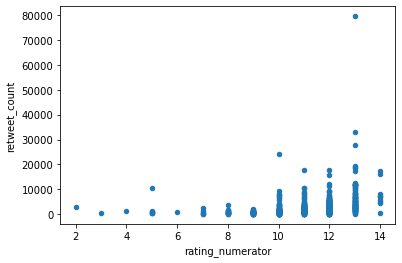

In [268]:

df5.plot(x = 'rating_numerator', y = 'retweet_count', kind = 'scatter');

In [269]:
df5['rating_numerator'].corr(df5['retweet_count'])

0.3130053787776034

### the 1st insight is that there is a positive corelation between the dog rating and the number of retweets
### so we can expect that the more rating a dog gets the more retweet it will get as well in general

### Analyzing and Visualizing 2:

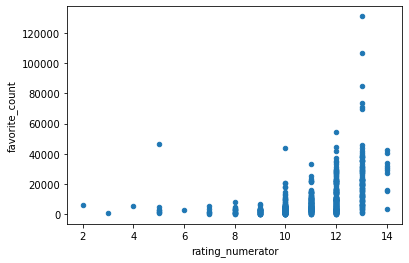

In [270]:
df5.plot(x = 'rating_numerator', y = 'favorite_count', kind = 'scatter');

In [271]:
df5['rating_numerator'].corr(df5['favorite_count'])

0.4288089915101192

### the 2nd insight is that there is a positive corelation between the dog rating and the number of favorite, this corelation is stronger with favorite than with retweet, which indicate that people tend to hit like on the top dogs more than retweeting them

### Analyzing and Visualizing 3:

In [272]:
grouped_Df = df5.groupby(['p1'])['rating_numerator'].mean()
grouped_Df = grouped_Df.reset_index() ## to continue working on a data frame instead of multi index series

In [273]:
grouped_Df.sort_values('rating_numerator', ascending=True)

,p1,rating_numerator
73,miniature_schnauzer,5.00
6,Boston_bull,7.75
78,soft-coated_wheaten_terrier,8.00
61,dalmatian,8.80
27,Maltese_dog,9.00
...,...,...
26,Leonberg,13.00
55,briard,13.00
0,Afghan_hound,13.00
50,black-and-tan_coonhound,14.00


In [274]:
grouped_Df.sort_values('rating_numerator', ascending=False)

,p1,rating_numerator
18,Gordon_setter,14.00
50,black-and-tan_coonhound,14.00
0,Afghan_hound,13.00
55,briard,13.00
26,Leonberg,13.00
...,...,...
27,Maltese_dog,9.00
61,dalmatian,8.80
78,soft-coated_wheaten_terrier,8.00
6,Boston_bull,7.75


### the 3rd insight is that miniature_schnauzer & Boston_bull are the least liked types of dogs, while Gordon_setter & black-and-tan_coonhound are the most liked types of dogs

### Analyzing and Visualizing 4:

In [275]:
grouped_Df2 = df5.groupby(['stage'])['rating_numerator'].mean()
grouped_Df2 = grouped_Df2.reset_index() ## to continue working on a data frame instead of multi index series

In [276]:
grouped_Df2.sort_values('rating_numerator', ascending=False)

,stage,rating_numerator
5,puppo,12.400000
3,floofer,12.333333
1,doggo,12.125000
4,pupper,11.120000
0,,11.037924
2,"doggo,pupper",11.000000


### the 3rd insight is that puppo & floofer are the most liked dogs stages